In [1]:
from my_logistic_regression import MyLogisticRegression as MyLR
from data_spliter import data_spliter
from minmax import minmax
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Functions

In [2]:
def plot(x, y, y_hat, labels, colors):
    try:
        plt.plot(x, y, 'o', color=colors[0], label=labels[0])
        plt.plot(x, y_hat, '.', color=colors[1], label=labels[1])
        plt.xlabel(labels[2])
        plt.ylabel(labels[3])
        plt.legend()
        plt.show()
    except Exception as err:
        print(err)

In [3]:
def regress(x, y, thetas, alpha, max_iter, labels, colors, plot_all=True):
    try:
        print("------------")
        lm = MyLR(thetas, alpha=alpha, max_iter=max_iter)
        lm.fit_(x, y)
        y_pred = lm.predict_(x)
        mse = lm.loss_(y, y_pred)
        print("Score: {0}".format(mse))
        print("Theta: {0}".format(lm.thetas))
        plot(x[:,0], y, y_pred, labels, colors)
        if plot_all:
            for i in range(1, x.shape[1]):
                plot(x[:,i], y, y_pred, labels, colors)
        return y_pred, mse, lm.thetas
        print("------------")
    except Exception as err:
        print(err)

# Data

In [4]:
x = pd.read_csv("../ressources/solar_system_census.csv")
x.head()

,Unnamed: 0,height,weight,bone_density
0,0,172.274151,86.970349,1.018098
1,1,198.977479,104.855553,0.697414
2,2,207.119681,87.401047,0.723361
3,3,184.642721,63.142295,0.547739
4,4,179.384814,67.523257,1.076022


In [5]:
y = pd.read_csv("../ressources/solar_system_census_planets.csv")
y['Origin'][y['Origin'] == 0] = -1
y['Origin'][y['Origin'] > 0] = 0
y['Origin'][y['Origin'] == -1] = 1
y.head()

,Unnamed: 0,Origin
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,1.0


In [6]:
norm_x = x.copy()

#for col in x.columns[1:]:
#    norm_x[col] = minmax(x[col])

norm_x.head()

,Unnamed: 0,height,weight,bone_density
0,0,172.274151,86.970349,1.018098
1,1,198.977479,104.855553,0.697414
2,2,207.119681,87.401047,0.723361
3,3,184.642721,63.142295,0.547739
4,4,179.384814,67.523257,1.076022


In [7]:
norm_y = y.copy()
#norm_y['Origin'] = minmax(y['Origin'])
norm_y.head()

,Unnamed: 0,Origin
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,1.0


In [8]:
np_x = np.array(norm_x)
np_y = np.array(norm_y)

np_y[:,-1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0.])

In [10]:
x_train, x_test, y_train, y_test = data_spliter(np_x, np_y, 0.8, True)
y_train = y_train
y_test = y_test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

salut
[[ 46.         192.35655958  88.89335693   0.74615535   0.        ]
 [ 94.         152.44921893  77.10697431   1.01443247   1.        ]
 [ 55.         208.51013217  84.51606449   0.82732584   0.        ]
 [ 51.         180.51466254  64.4798182    0.84306063   1.        ]
 [ 24.         165.30761397  74.78477598   0.80081423   1.        ]
 [101.         171.83514171  73.32522883   0.91948024   1.        ]
 [ 91.         165.68445274  81.74617948   0.90441095   0.        ]
 [ 93.         192.74850293  67.87472275   0.91465294   0.        ]
 [110.         187.35238533  72.93278418   0.85825292   1.        ]
 [  8.         181.45156018  88.18505435   0.96057855   0.        ]
 [ 37.         189.7989592   84.4518319    0.7660771    1.        ]
 [119.         186.10946524  93.98876399   0.52337133   0.        ]
 [ 88.         189.02549527  71.01484511   0.49034714   0.        ]
 [111.         158.10327683  82.86349953   1.08583658   1.        ]
 [ 59.         185.51618897  82.77522273  

((96, 4), (24, 4), (96, 1), (24, 1))

# Model training

In [14]:
alpha=0.001
max_iter=10000
theta = np.ones(4).reshape(-1, 1)
theta

array([[1.],
       [1.],
       [1.],
       [1.]])

In [15]:
lm = MyLR(theta, alpha=0.001, max_iter=10000)
lm.fit_(x_train[:,1:], y_train)
y_pred = lm.predict_(x_train[:,1:])
mse = lm.loss_(x_train[:,1:], y_train)
lm.predict_(x_train[:,1:])

In [16]:
mse

5.811530143577803

In [17]:
lm.thetas

array([[ 1.1096249 ],
       [-0.04114298],
       [-0.22361951],
       [ 1.23298584]])

In [18]:
y_pred

array([[6.47684853e-12],
       [6.49750188e-10],
       [9.80172087e-12],
       [2.79132405e-09],
       [4.94454854e-10],
       [6.06430803e-10],
       [1.16626818e-10],
       [8.62676789e-10],
       [3.24222767e-10],
       [1.54818641e-11],
       [1.99102810e-11],
       [2.03630352e-12],
       [2.95261108e-10],
       [1.55202715e-10],
       [4.03852972e-11],
       [2.04150467e-14],
       [1.54300692e-12],
       [7.16123588e-12],
       [1.15248866e-10],
       [3.80984324e-10],
       [5.44600960e-11],
       [1.35548413e-11],
       [1.12949305e-10],
       [7.38184535e-12],
       [2.91677420e-11],
       [1.66548826e-10],
       [4.78956808e-12],
       [4.32150722e-11],
       [1.86133469e-12],
       [1.92296363e-10],
       [3.48240208e-12],
       [6.56720060e-12],
       [6.92586604e-11],
       [1.82203957e-10],
       [3.31256033e-11],
       [4.29588563e-11],
       [5.14861222e-12],
       [6.80553289e-14],
       [3.50834968e-13],
       [1.17486830e-10],


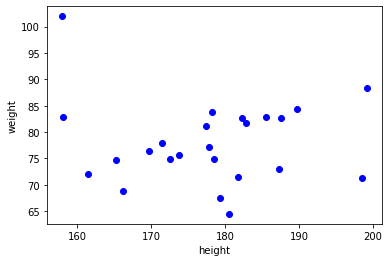

In [15]:
X = x_train[:,1:]
Y = y_train[:,-1]

plt.plot(X[np.where(Y==1),0], X[np.where(Y==1),1], 'o', color='b', label="Origin")
plt.plot(X[np.where(y_pred>.5),0], X[np.where(y_pred>.5),1], '.', color='c', label="Prediction")
plt.xlabel(x.columns[1])
plt.ylabel(x.columns[2])
#plt.legend()
plt.show()

#for i in range(1, x_train.shape[1]):
#    plot(x_train[:,i], y_train[:,-1], y_pred, 
#        ['Origin', 'Predicted origin', "x: {0}".format(x.columns[i]), "y: origin"], ['b', 'c'])

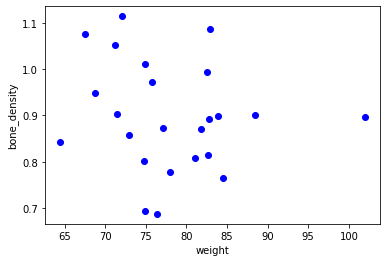

In [16]:
plt.plot(X[np.where(Y==1),1], X[np.where(Y==1),2], 'o', color='b', label="Origin")
plt.plot(X[np.where(y_pred>.9),1], X[np.where(y_pred>.9),2], '.', color='c', label="Prediction")
plt.xlabel(x.columns[2])
plt.ylabel(x.columns[3])
#plt.legend()
plt.show()

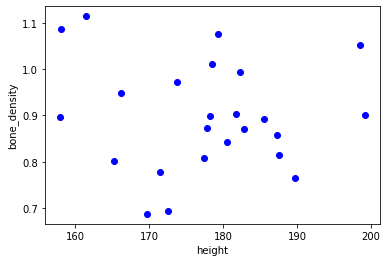

In [17]:
plt.plot(X[np.where(Y==1),0], X[np.where(Y==1),2], 'o', color='b', label="Origin")
plt.plot(X[np.where(y_pred>.9),0], X[np.where(y_pred>.9),2], '.', color='c', label="Prediction")
plt.xlabel(x.columns[1])
plt.ylabel(x.columns[3])
#plt.legend()
plt.show()

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_train[:,1], x_train_mp[:,2], y_train, marker='o', color='b', label='target')
ax.scatter(x_train_mp[:,0], x_train_mp[:,2], y_pred_mp, marker='.', color='c', label='predicted target')
ax.set_xlabel("x: {0}".format(data.columns[1]))
ax.set_ylabel("y: {0}".format(data.columns[2]))
ax.set_zlabel("z: {0}".format(data.columns[4]))
plt.legend()

ValueError: Unknown projection '3d'